## eScooter Pilot Impact to 2018 NiceRide Trips

**Question:** In July of 2018, the city of Minneapolis piloted an eScooter program from August through November 2018. Did the introduction of this program have an impact on NiceRide ridership? 

- Sought two measures of ridership: Total rides and trip duration
    - Total rides is an indicator for demand for NiceRide bikes
    - Due to the fee structure, longer rides will cost a user more potentially providing extra revenue to the organizations.<br>

 
- Compared two 2018 time periods: April through July and August through November.<br>


- Conducted t-test for each ridership measure.<br>


- **Conclusion 1:** 
    - The average of monthly total trips was higher than 2017 then in 2018. However, when conducting a independent t-test on this metric, the result was (statistic=0.41649997186076, pvalue=0.6833606911535794). From this we failed to reject the null hypothesis the means are not statistically different. This was a useful test as the data was relatively normally distributed and the samples were independent.<br>
    
    
- **Conclusion 2:**
    - The median of trip duration was slightly higher in 2018 than in 2017. When conducting an independent t-test on this metric, the result was (statistic=-9.902631940092293, pvalue=4.0718420819885724e-23). At first glance, it appears we can reject thenull hypothesis the means are not statistically different. However, upon closer inspection of the data, it is not normally distributed so the independent t-test was not an appropriate measure of statistical significance.<br>
    
    
- **Discusion:**
    - I attempted several methods to test the normality of the distrbution for the trip duration data.
        - Reviewed descriptive statistics to understand averages and standard deviations.  This was my first hint the data was highly skewed.  
        -  Q-Q plot to help visualize the distribution. From my understanding, using the Q-Q plot, if the data is normally distributed, the ploted points will follow a 45 degree line from bottom left to upper right corner. In this case, the data was far from this and sketched a straight line with a sharp incline at the far right. 
        - The data in it's raw form was not condusive to visualizing distribution in a histogram. 
    - I tried to normalize the data and ultimately calcuated the inter-quartile range to find upper and lower bounds.  Then I filtered the data to only include observations within that bounded range. After removing the outliers in this way, I was able to vizualize the data using a simple histogram which showed the data was skewed to the right. 


   
    
    
    
    

    



In [54]:
#Read in dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import scipy.stats as stats
from datetime import datetime
from dateutil import parser
import calendar 
from functools import reduce

#read in 2018 monthly data

apr2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201804-niceride-tripdata.csv", low_memory=False)
may2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201805-niceride-tripdata.csv", low_memory=False)
jun2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201806-niceride-tripdata.csv", low_memory=False)
jul2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201807-niceride-tripdata.csv", low_memory=False)
aug2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201808-niceride-tripdata.csv", low_memory=False)
sep2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201809-niceride-tripdata.csv", low_memory=False)
oct2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201810-niceride-tripdata.csv", low_memory=False)
nov2018 = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/201811-niceride-tripdata.csv", low_memory=False)

_2017_data = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2017/Nice_Ride_trip_history_2017_season.csv", low_memory=False)

_2018_data = pd.read_csv("../Project1CSV/Niceride 2010to2018/NR2018/data_2018.csv", low_memory=False)


_2017_data = _2017_data.dropna(how="any")

_2017_data.head()
                      
                      

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
0,11/5/2017 21:45,Hennepin Ave & S Washington Ave,30184,11/5/2017 22:02,Logan Park,30104,Member,1048
1,11/5/2017 21:45,Broadway Street N & 4th Street E,30122,11/5/2017 22:26,Broadway Street N & 4th Street E,30122,Member,2513
2,11/5/2017 21:43,Dale Street & Grand Ave.,30106,11/5/2017 22:13,N Milton Street & Summit Ave,30101,Member,1817
3,11/5/2017 21:41,Weisman Art Museum,30183,11/5/2017 22:05,22nd Ave S & Franklin Ave,30014,Casual,1399
4,11/5/2017 21:38,South 2nd Street & 3rd Ave S,30030,11/5/2017 21:44,6th Ave SE & University Ave,30088,Member,370


### Comparing trip count for the time periods between April - July and August - November 2018

In [2]:
#Create variables used to analys rides for each month.

#calculate montly total rides
apr_total = apr2018["start_time"].count()
may_total = may2018["start_time"].count()
jun_total = jun2018["start_time"].count()
jul_total = jul2018["start_time"].count()
aug_total = aug2018["start_time"].count()
sep_total = sep2018["start_time"].count()
oct_total = oct2018["start_time"].count()
nov_total = nov2018["start_time"].count()


#calculate testing period averages
apr_jul_avg = (apr_total + may_total + jun_total + jul_total) / 4
aug_nov_avg = (aug_total + sep_total + oct_total + nov_total) / 4




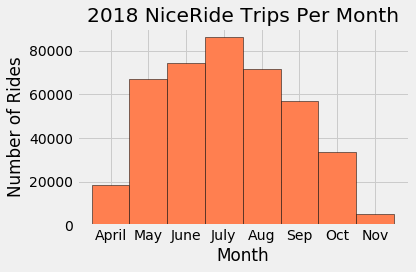

In [3]:
#plot average rides per month
plt.style.use('fivethirtyeight')

x1 = ['April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov']
monthly_totals = [apr_total, may_total, jun_total, jul_total, aug_total, sep_total, oct_total, nov_total]

plt.bar(x1, monthly_totals, width=1, align="center",color="coral", edgecolor="black")
plt.title("2018 NiceRide Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")


plt.tight_layout()

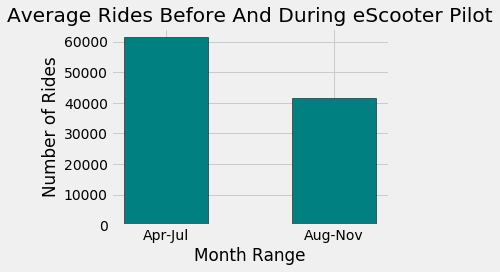

In [4]:
#Plot avergage rides over the two time periodes in question.
plt.style.use('fivethirtyeight')
x2 = ["Apr-Jul", "Aug-Nov"]
period_avgs = [apr_jul_avg, aug_nov_avg]

plt.bar(x2,period_avgs, width=.5, align="center", edgecolor="black", color="teal")
plt.title("Average Rides Before And During eScooter Pilot")
plt.xlabel("Month Range")
plt.ylabel("Number of Rides")

plt.tight_layout()

### Comparing trip duration for the time periods between April - July and August - November 2018

In [5]:
#Create varialbes and data frames used for plotting.

#calculate median trip duration for each month
apr_dur_avg = apr2018["tripduration"].median()
may_dur_avg = may2018["tripduration"].median()
jun_dur_avg = jun2018["tripduration"].median()
jul_dur_avg = jul2018["tripduration"].median()
aug_dur_avg = aug2018["tripduration"].median()
sep_dur_avg = sep2018["tripduration"].median()
oct_dur_avg = oct2018["tripduration"].median()
nov_dur_avg = nov2018["tripduration"].median()



#concantinate each month's dataframe to create the two time periods being examined. 
frames1 = [apr2018, may2018, jun2018, jul2018]
frames2 = [aug2018, sep2018, oct2018, nov2018]

apr_jul_df = pd.concat(frames1)
aug_nov_df = pd.concat(frames2)

#calculate median for each time period.
apr_jul_dur_med = apr_jul_df["tripduration"].median()
aug_nov_dur_med = aug_nov_df["tripduration"].median()


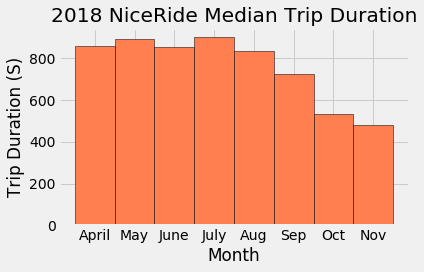

In [6]:
#Plot median trip duration for each month. 

montly_dur_avg = [apr_dur_avg, may_dur_avg, jun_dur_avg, jul_dur_avg, aug_dur_avg, sep_dur_avg, oct_dur_avg, nov_dur_avg]

plt.bar(x1, montly_dur_avg, width=1, align="center",color="coral", edgecolor="black")
plt.title("2018 NiceRide Median Trip Duration")
plt.xlabel("Month")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()

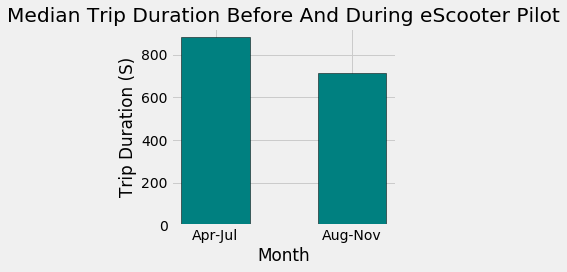

In [7]:



period_med_dur = [apr_jul_dur_med, aug_nov_dur_med]

plt.bar(x2, period_med_dur, width=.5, align="center",color="teal", edgecolor="black")
plt.title("Median Trip Duration Before And During eScooter Pilot")
plt.xlabel("Month")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()

### T-Tests for number of rides and average trip duration comparing the time periods of  April - July and August - November 2018

In [8]:
#create create two series containing the total number of rides in each month in order to compare the two time periods
apr_jul = [apr_total, may_total, jun_total, jul_total]
aug_nov = [aug_total, sep_total, oct_total, nov_total]

#Execute t-test for number of rides in each time period.
stats.ttest_ind(apr_jul, aug_nov, equal_var=False)

Ttest_indResult(statistic=0.9448450344256898, pvalue=0.3812340689599901)

In [9]:
#Execute t-test for trip duration in each time period. 
stats.ttest_ind(apr_jul_df["tripduration"], aug_nov_df["tripduration"], equal_var=False)

Ttest_indResult(statistic=-1.9297328795615096, pvalue=0.05364066980903367)

### What follows below is my "sketch book " attempting to compare number of trips and trip duration between 2017 and 2018. I felt my original statistical analysis was problematic and needed to dig deeper.  This was not edited nor cleaned up. Please see project PowerPoint for analysis. 

In [117]:
_2017_data["Month Number"] = pd.DatetimeIndex(_2017_data["Start date"]).month
_2017_data["Month Name"] = _2017_data["Month Number"].apply(lambda x: calendar.month_name[x])

_2017_data.head()

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds),Month Number,Month Name
0,11/5/2017 21:45,Hennepin Ave & S Washington Ave,30184,11/5/2017 22:02,Logan Park,30104,Member,1048,11,November
1,11/5/2017 21:45,Broadway Street N & 4th Street E,30122,11/5/2017 22:26,Broadway Street N & 4th Street E,30122,Member,2513,11,November
2,11/5/2017 21:43,Dale Street & Grand Ave.,30106,11/5/2017 22:13,N Milton Street & Summit Ave,30101,Member,1817,11,November
3,11/5/2017 21:41,Weisman Art Museum,30183,11/5/2017 22:05,22nd Ave S & Franklin Ave,30014,Casual,1399,11,November
4,11/5/2017 21:38,South 2nd Street & 3rd Ave S,30030,11/5/2017 21:44,6th Ave SE & University Ave,30088,Member,370,11,November


In [121]:
month_count_2017 = _2017_data.groupby("Month Name")["Start date"].count()

med_2017_ride_dur = _2017_data.groupby("Month Name")["Total duration (Seconds)"].median()

print(month_count_2017)
print(med_2017_ride_dur)

Month Name
April        39694
August       70822
July         95566
June         77014
May          61165
November      2344
October      42691
September    71422
Name: Start date, dtype: int64
Month Name
April        714
August       786
July         908
June         836
May          823
November     435
October      535
September    662
Name: Total duration (Seconds), dtype: int64


In [12]:


month_count_2018 = [apr_total, may_total, jun_total, jul_total,aug_total, sep_total, oct_total, nov_total]



month_count_2018

[18303, 66882, 74349, 86008, 71734, 56692, 33384, 5071]

In [13]:
stats.ttest_ind(month_count_2017, month_count_2018, equal_var=False)

Ttest_indResult(statistic=0.41649997186076, pvalue=0.6833606911535794)

In [14]:
stats.ttest_ind(_2017_data["Total duration (Seconds)"], _2018_data["tripduration"], equal_var=False)

Ttest_indResult(statistic=-9.902631940092293, pvalue=4.0718420819885724e-23)

In [30]:
_2017_data["Total duration (Seconds)"].describe()

count    4.607180e+05
mean     2.276507e+03
std      4.393244e+04
min      6.000000e+01
25%      4.080000e+02
50%      7.640000e+02
75%      1.483000e+03
max      1.135480e+07
Name: Total duration (Seconds), dtype: float64

In [29]:
_2018_data["tripduration"].describe()

count    4.124230e+05
mean     3.824941e+03
std      9.141186e+04
min      6.100000e+01
25%      4.340000e+02
50%      8.080000e+02
75%      1.548000e+03
max      1.113625e+07
Name: tripduration, dtype: float64

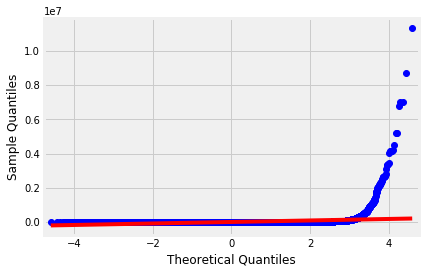

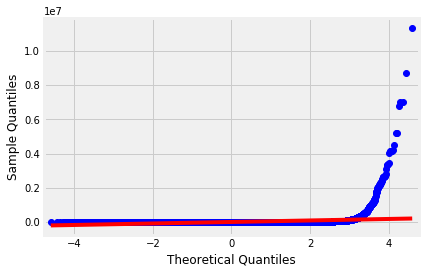

In [34]:
from statsmodels.graphics.gofplots import qqplot

qqplot(_2017_data["Total duration (Seconds)"], line='s')

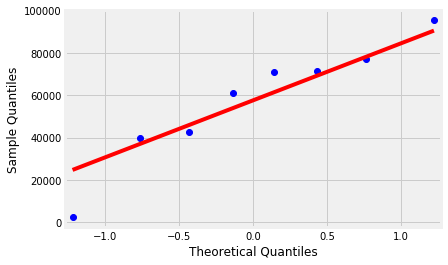

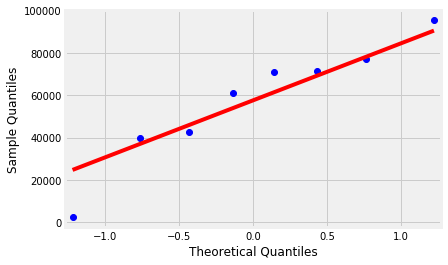

In [53]:
qqplot(month_count_2017, line='s')

In [38]:
_2017_data_outliers = _2017_data[np.abs(_2017_data["Total duration (Seconds)"]-_2017_data["Total duration (Seconds)"].mean()) <= (3*_2017_data["Total duration (Seconds)"].std())]

_2018_data_outliers = _2018_data[np.abs(_2018_data["tripduration"]-_2018_data["tripduration"].mean()) <= (3*_2018_data["tripduration"].std())]




In [40]:
_2018_data_outliers["tripduration"].describe()

count    411906.000000
mean       1717.702012
std        6747.364556
min          61.000000
25%         434.000000
50%         807.000000
75%        1544.000000
max      276935.000000
Name: tripduration, dtype: float64

In [43]:
_2017_data_outliers["Total duration (Seconds)"].describe()

count    460145.000000
mean       1474.947214
std        4368.471679
min          60.000000
25%         407.000000
50%         763.000000
75%        1479.000000
max      133592.000000
Name: Total duration (Seconds), dtype: float64

In [75]:


stats.ttest_ind(_2017_data_outliers["Total duration (Seconds)"], _2018_data_outliers["tripduration"], equal_var=False)


460718

In [99]:
q25, q75 = np.percentile(_2017_data["Total duration (Seconds)"], 25), np.percentile(
    _2017_data["Total duration (Seconds)"], 75) 
     

iqr = q75-q25


cut_off = iqr*1.5
lower, upper = q25-cut_off, q75 + cut_off

outliers_2017 = [x for x in _2017_data["Total duration (Seconds)"] if x < lower or x > upper ]

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

print(str(len(outliers_2017)) + " outliers removed")

outliers_removed_2017 = [x for x in _2017_data["Total duration (Seconds)"] if x >= lower and x <= upper ]

print('non-outlier observations ' + str(len(outliers_removed_2017)))


Percentiles: 25th=408.000, 75th=1483.000, IQR=1075.000
33691 outliers removed
non-outlier observations 427027


In [111]:
q25, q75 = np.percentile(_2018_data["tripduration"], 25), np.percentile(
    _2018_data["tripduration"], 75) 
     

iqr = q75-q25


cut_off = iqr*1.5
lower, upper = q25-cut_off, q75 + cut_off

outliers_2018 = [x for x in _2018_data["tripduration"] if x < lower or x > upper ]

print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

print(str(len(outliers_2018)) + " outliers removed")

outliers_removed_2018 = [x for x in _2018_data["tripduration"] if x >= lower and x <= upper ]

print('non-outlier observations ' + str(len(outliers_removed_2018)))

Percentiles: 25th=434.000, 75th=1548.000, IQR=1114.000
32176 outliers removed
non-outlier observations 380247


In [106]:
print("2017 mean: " + str(mean(outliers_removed_2017)))
print("2018 mean: " + str(mean(outliers_removed_2018)))
print("2017 std: " + str(std(outliers_removed_2017)))
print("2018 std: " + str(std(outliers_removed_2018)))

2017 mean: 904.7817702393526
2018 mean: 946.9110762215087
2017 std: 664.2842238358045
2018 std: 689.9378565103112


In [108]:
stats.ttest_ind(outliers_removed_2018, outliers_removed_2017, equal_var=False)

Ttest_indResult(statistic=27.868910590887, pvalue=7.698087792537775e-171)

(array([ 96165., 109040.,  66091.,  47794.,  37347.,  28227.,  16534.,
         11108.,   8217.,   6504.]),
 array([  60. ,  363.5,  667. ,  970.5, 1274. , 1577.5, 1881. , 2184.5,
        2488. , 2791.5, 3095. ]),
 <a list of 10 Patch objects>)

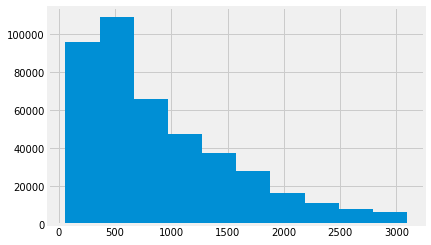

In [109]:
plt.hist(outliers_removed_2017)

(array([81931., 98139., 61445., 42705., 34146., 24044., 14141.,  9882.,
         7608.,  6206.]),
 array([  61. ,  376.8,  692.6, 1008.4, 1324.2, 1640. , 1955.8, 2271.6,
        2587.4, 2903.2, 3219. ]),
 <a list of 10 Patch objects>)

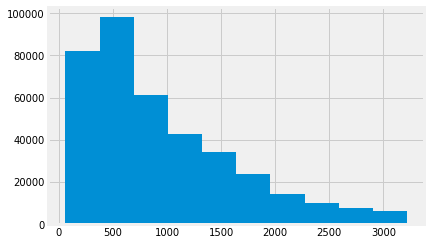

In [110]:
plt.hist(outliers_removed_2018)

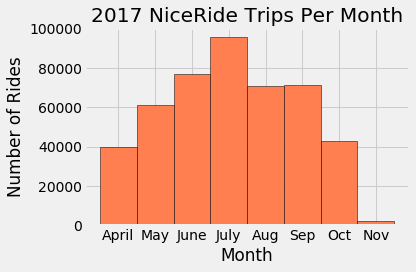

In [130]:
plt.style.use('fivethirtyeight')
x1 = ['April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov']
month_count_2017 = [39694, 61165, 77014, 95566, 70822, 71422, 42691, 2344]

plt.bar(x1, month_count_2017, width=1, align="center",color="coral", edgecolor="black")
plt.title("2017 NiceRide Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")


plt.tight_layout()

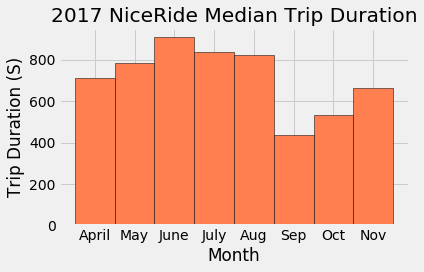

In [131]:
y = [714, 823, 836, 908, 786, 662, 535, 435]

plt.bar(x1, med_2017_ride_dur, width=1, align="center",color="coral", edgecolor="black")
plt.title("2017 NiceRide Median Trip Duration")
plt.xlabel("Month")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()

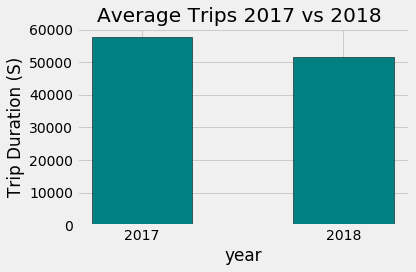

In [138]:
years = ["2017", "2018"]

avg_ride_2018 =(apr_total + may_total + jun_total + jul_total + aug_total + sep_total + oct_total + nov_total) / 8
avg_ride_2017 = (39694 + 61165 + 77014 + 95566 + 70822 + 71422 + 42691 + 2344) / 8
y = [avg_ride_2017, avg_ride_2018]

plt.bar(years, y, width=.5, align="center",color="teal", edgecolor="black")
plt.title("Average Trips 2017 vs 2018 ")
plt.xlabel("year")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()

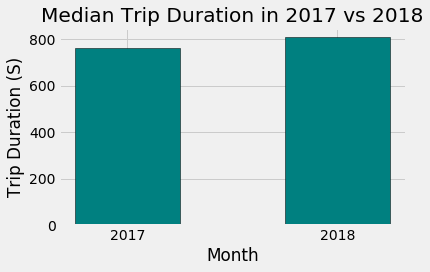

In [137]:
y = [_2017_data["Total duration (Seconds)"].median(), _2018_data["tripduration"].median()]

plt.bar(years, y, width=.5, align="center",color="teal", edgecolor="black")
plt.title("Median Trip Duration in 2017 vs 2018")
plt.xlabel("Month")
plt.ylabel("Trip Duration (S)")
plt.tight_layout()